# FOOTBALL TEAMS PRICE DATASET ANALYSIS

#### **Description**

Overview
The "Predicting Football Team Valuations" dataset is a meticulously curated collection of data points designed to aid in the analysis and modeling of football team prices across major European leagues. This dataset encompasses a variety of discrete and categorical features, providing a comprehensive view of the factors influencing the financial valuation of football teams.

#### **Content**

The dataset contains 50000 samples, each representing a unique football team. The data is split into 15 numeric columns, 10 categorical columns, and a target column representing the team's market price in billions of dollars. The target prices range from 0.5 billion to 5 billion dollars, reflecting realistic valuations seen in the football industry.

In [448]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
# import pandas_profiling as pp
import autoreload
import missingno as msno
import csv
import warnings

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import precision_score, recall_score, r2_score, confusion_matrix

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('darkgrid')
sb.set()

warnings.filterwarnings('ignore')

#### **1. Descriptive Analytics**
- Summary Statistics: Calculate mean, median, standard deviation, and other statistics for each attribute.
- Distribution Analysis: Plot histograms, box plots, and density plots to understand the distribution of different variables.
#### **2. Predictive Analytics**
- Performance Prediction: Predict future performance metrics (e.g., number of wins, goals scored) based on historical data.
- Revenue Forecasting: Predict future revenue based on past performance, attendance, and other financial metrics.
- Player Market Value Prediction: Predict the market value of players based on various attributes like age, performance metrics, and market trends.
#### **3. Prescriptive Analytics**
- Optimal Team Formation: Use optimization techniques to suggest the best team formation for maximizing wins or minimizing losses.
- Transfer Market Strategy: Recommend players to buy or sell based on performance metrics and financial constraints.
#### **4. Clustering and Segmentation**
- Team Segmentation: Group teams into clusters based on similar attributes (e.g., performance metrics, financial metrics) to identify patterns and similarities.
- Player Segmentation: Cluster players based on their market value, performance metrics, and age to identify different player profiles.
#### **5. Classification**
- Win/Loss Prediction: Classify matches as win, loss, or draw based on pre-match data.
- League Classification: Classify teams into different leagues or divisions based on their performance metrics and other attributes.
#### **6. Anomaly Detection**
- Financial Anomalies: Detect anomalies in financial metrics like revenue, transfer spending, and transfer income.
- Performance Anomalies: Identify unusual patterns in team or player performance metrics.
#### **7. Visualization**
- Correlation Analysis: Visualize correlations between different attributes using heatmaps.
- Performance Trends: Plot time series of various performance metrics to visualize trends over time.
- Comparative Analysis: Compare different teams or players on various metrics using bar charts, scatter plots, and radar charts.
#### **8. Advanced Analytics**
- Player Impact Analysis: Assess the impact of individual players on the team's overall performance using regression analysis or advanced modeling techniques.
- Sentiment Analysis: Analyze fan sentiment from social media or other sources and correlate it with team performance or revenue.

In [449]:
df = pd.read_csv("D:\Open Classroom\Datasets\Football Teams Price Prediction\Football_teams_price_data.csv")
df.head()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,League,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,79.972750,49,713.968872,15.847841,14.361253,La Liga,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,"4,375,181,628"
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,26.731697,23.967076,Bundesliga,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,"859,750,388"
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,136.648762,38,410.502058,21.365171,64.309831,Ligue 1,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,"2,168,913,729"
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,168.683160,6,177.561791,21.483504,82.352127,La Liga,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,"1,426,481,894"
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,188.768072,11,562.114099,26.938414,90.614463,Serie A,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,"4,038,110,631"


In [450]:
df.shape

(50000, 26)

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AveragePlayerAge              50000 non-null  float64
 1   TotalGoalsLastSeason          50000 non-null  int64  
 2   MatchesWonLastSeason          50000 non-null  int64  
 3   MatchesDrawnLastSeason        50000 non-null  int64  
 4   MatchesLostLastSeason         50000 non-null  int64  
 5   TotalGoalsConcededLastSeason  50000 non-null  int64  
 6   TotalRevenueLastSeason        50000 non-null  float64
 7   StadiumCapacity               50000 non-null  int64  
 8   AverageAttendance             50000 non-null  float64
 9   TransferSpendingLastSeason    50000 non-null  float64
 10  TransferIncomeLastSeason      50000 non-null  float64
 11  NumberOfTrophies              50000 non-null  int64  
 12  MarketValueOfSquad            50000 non-null  float64
 13  A

In [452]:
round(df.describe(include='all').T, 2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AveragePlayerAge,50000.0,NaN,NaN,NaN,26.480678,4.902909,18.000094,22.231468,26.481162,30.721124,34.999527
TotalGoalsLastSeason,50000.0,NaN,NaN,NaN,59.34316,23.095732,20.0,39.0,59.0,79.0,99.0
MatchesWonLastSeason,50000.0,NaN,NaN,NaN,18.42546,10.955441,0.0,9.0,18.0,28.0,37.0
MatchesDrawnLastSeason,50000.0,NaN,NaN,NaN,18.60446,10.980261,0.0,9.0,19.0,28.0,37.0
MatchesLostLastSeason,50000.0,NaN,NaN,NaN,18.4781,10.996911,0.0,9.0,18.0,28.0,37.0
TotalGoalsConcededLastSeason,50000.0,NaN,NaN,NaN,59.53868,23.049783,20.0,40.0,60.0,79.0,99.0
TotalRevenueLastSeason,50000.0,NaN,NaN,NaN,274.506391,130.150495,50.004035,161.259631,274.402274,387.154302,499.999691
StadiumCapacity,50000.0,NaN,NaN,NaN,54854.56788,25986.349661,10013.0,32312.25,54814.0,77337.25,99997.0
AverageAttendance,50000.0,NaN,NaN,NaN,47425.31115,24578.631962,5003.395786,26181.373046,47449.443426,68720.697593,89998.493713
TransferSpendingLastSeason,50000.0,NaN,NaN,NaN,99.845519,57.666798,0.006229,50.196498,99.927641,149.525266,199.997388


In [453]:
df.isnull().sum()

AveragePlayerAge                0
TotalGoalsLastSeason            0
MatchesWonLastSeason            0
MatchesDrawnLastSeason          0
MatchesLostLastSeason           0
TotalGoalsConcededLastSeason    0
TotalRevenueLastSeason          0
StadiumCapacity                 0
AverageAttendance               0
TransferSpendingLastSeason      0
TransferIncomeLastSeason        0
NumberOfTrophies                0
MarketValueOfSquad              0
AveragePlayerMarketValue        0
YouthAcademyRating              0
League                          0
Country                         0
Manager                         0
TeamFormation                   0
PlayingStyle                    0
HomeCity                        0
StadiumType                     0
MainSponsor                     0
KitManufacturer                 0
OwnershipType                   0
Price                           0
dtype: int64

In [454]:
df['Price'] = df['Price'].str.replace(',', '').astype('int64')

### Distribution Analysis

In [455]:
df.head()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,League,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,79.972750,49,713.968872,15.847841,14.361253,La Liga,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,4375181628
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,26.731697,23.967076,Bundesliga,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,859750388
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,136.648762,38,410.502058,21.365171,64.309831,Ligue 1,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,2168913729
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,168.683160,6,177.561791,21.483504,82.352127,La Liga,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,1426481894
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,188.768072,11,562.114099,26.938414,90.614463,Serie A,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,4038110631


In [456]:
def get_series(df):
    cat_list = []
    categories = df.select_dtypes(include=['float64', 'int64'])
    # categories = list(categories[categories].index)
    for i in categories:
        cat_list.append(i)
    print(cat_list)
    plt.figure(figsize=(20, 8))
    sb.heatmap(df[cat_list].corr(), annot=True, linewidths=.5)
    plt.title('Pearsons Correlation of Columns')

['AveragePlayerAge', 'TotalGoalsLastSeason', 'MatchesWonLastSeason', 'MatchesDrawnLastSeason', 'MatchesLostLastSeason', 'TotalGoalsConcededLastSeason', 'TotalRevenueLastSeason', 'StadiumCapacity', 'AverageAttendance', 'TransferSpendingLastSeason', 'TransferIncomeLastSeason', 'NumberOfTrophies', 'MarketValueOfSquad', 'AveragePlayerMarketValue', 'YouthAcademyRating', 'Price']


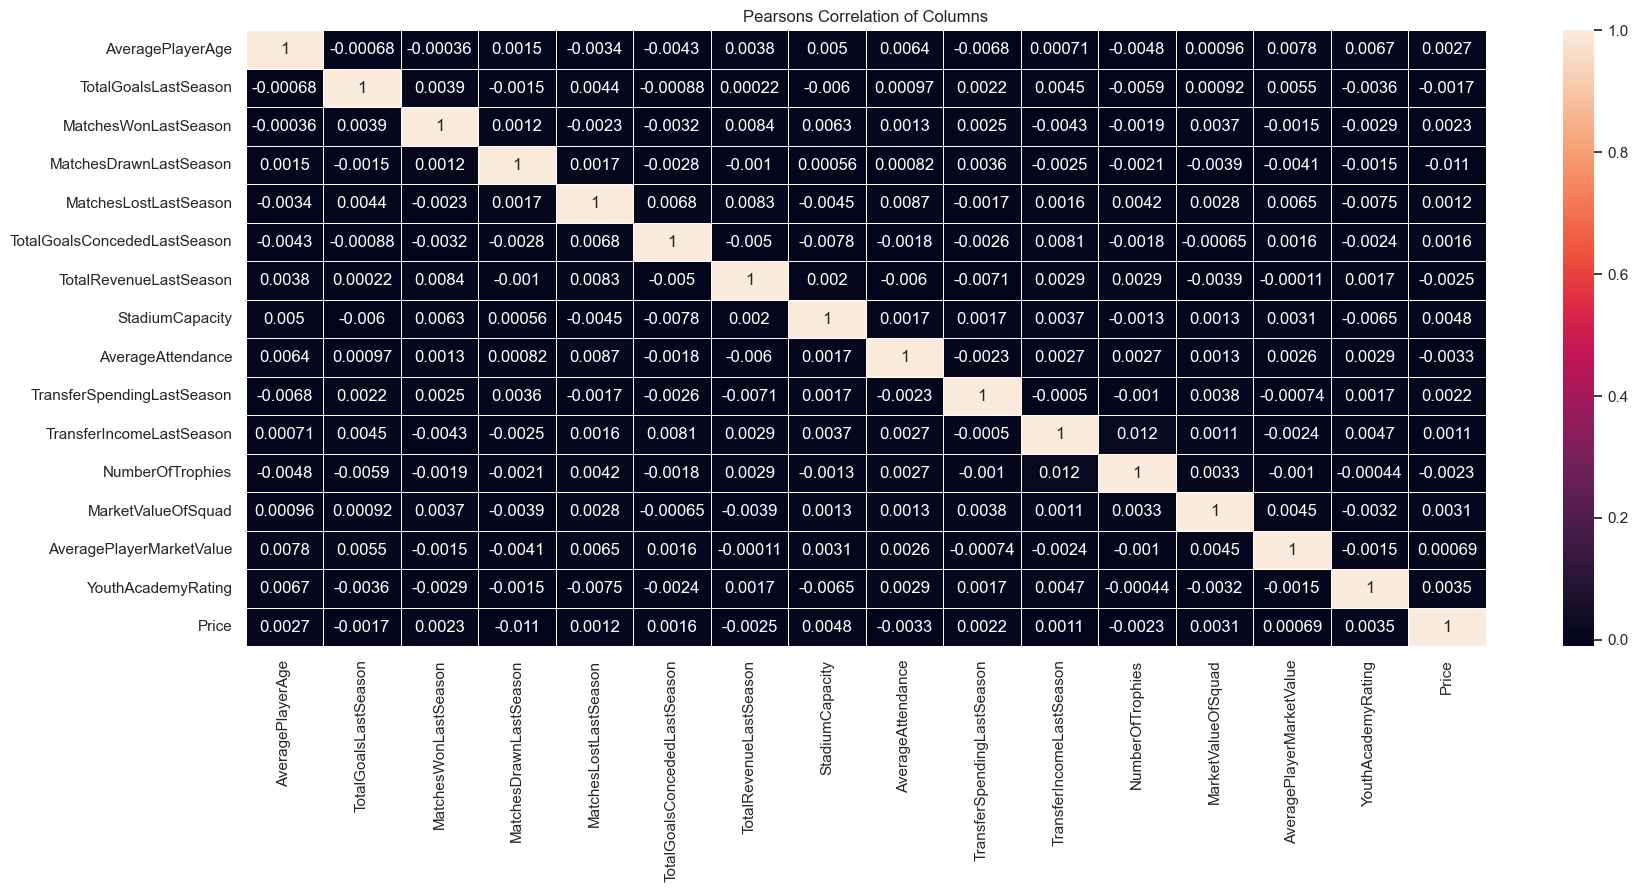

In [457]:
get_series(df)

In [458]:
def get_obj_cat(df):
    obj_list = []
    obj_categories = df.select_dtypes(include='object')
    for i in obj_categories:
        obj_list.append(i)
    print(obj_list)

    # plot the distribution features
    colors = ['#CD5C5C', '#40E0D0', '#FFBF00', '#808000', '#800080', '#000000', '#FFA500', '#800000', '#29465B', '#045F5F']
    fig, axes = plt.subplots(nrows=3, ncols=4, squeeze=False, figsize=(20, 20))
    axes = axes.flatten()

    for idx, ax in enumerate(obj_list):
        # colors = ['#CD5C5C', '#40E0D0', '#FFBF00', '#808000', '#800080']
        axes[idx].hist(df[ax], color=colors[idx])
        axes[idx].set_title(f'{ax} distribution \n---------------------------\n {df[ax].value_counts()}')
        axes[idx].legend(loc='best')
        axes[idx].set_xlabel('Category')
        axes[idx].set_ylabel('Freq')

    plt.tight_layout()
    
    plt.subplots_adjust(hspace=.6)

['League', 'Country', 'Manager', 'TeamFormation', 'PlayingStyle', 'HomeCity', 'StadiumType', 'MainSponsor', 'KitManufacturer', 'OwnershipType']


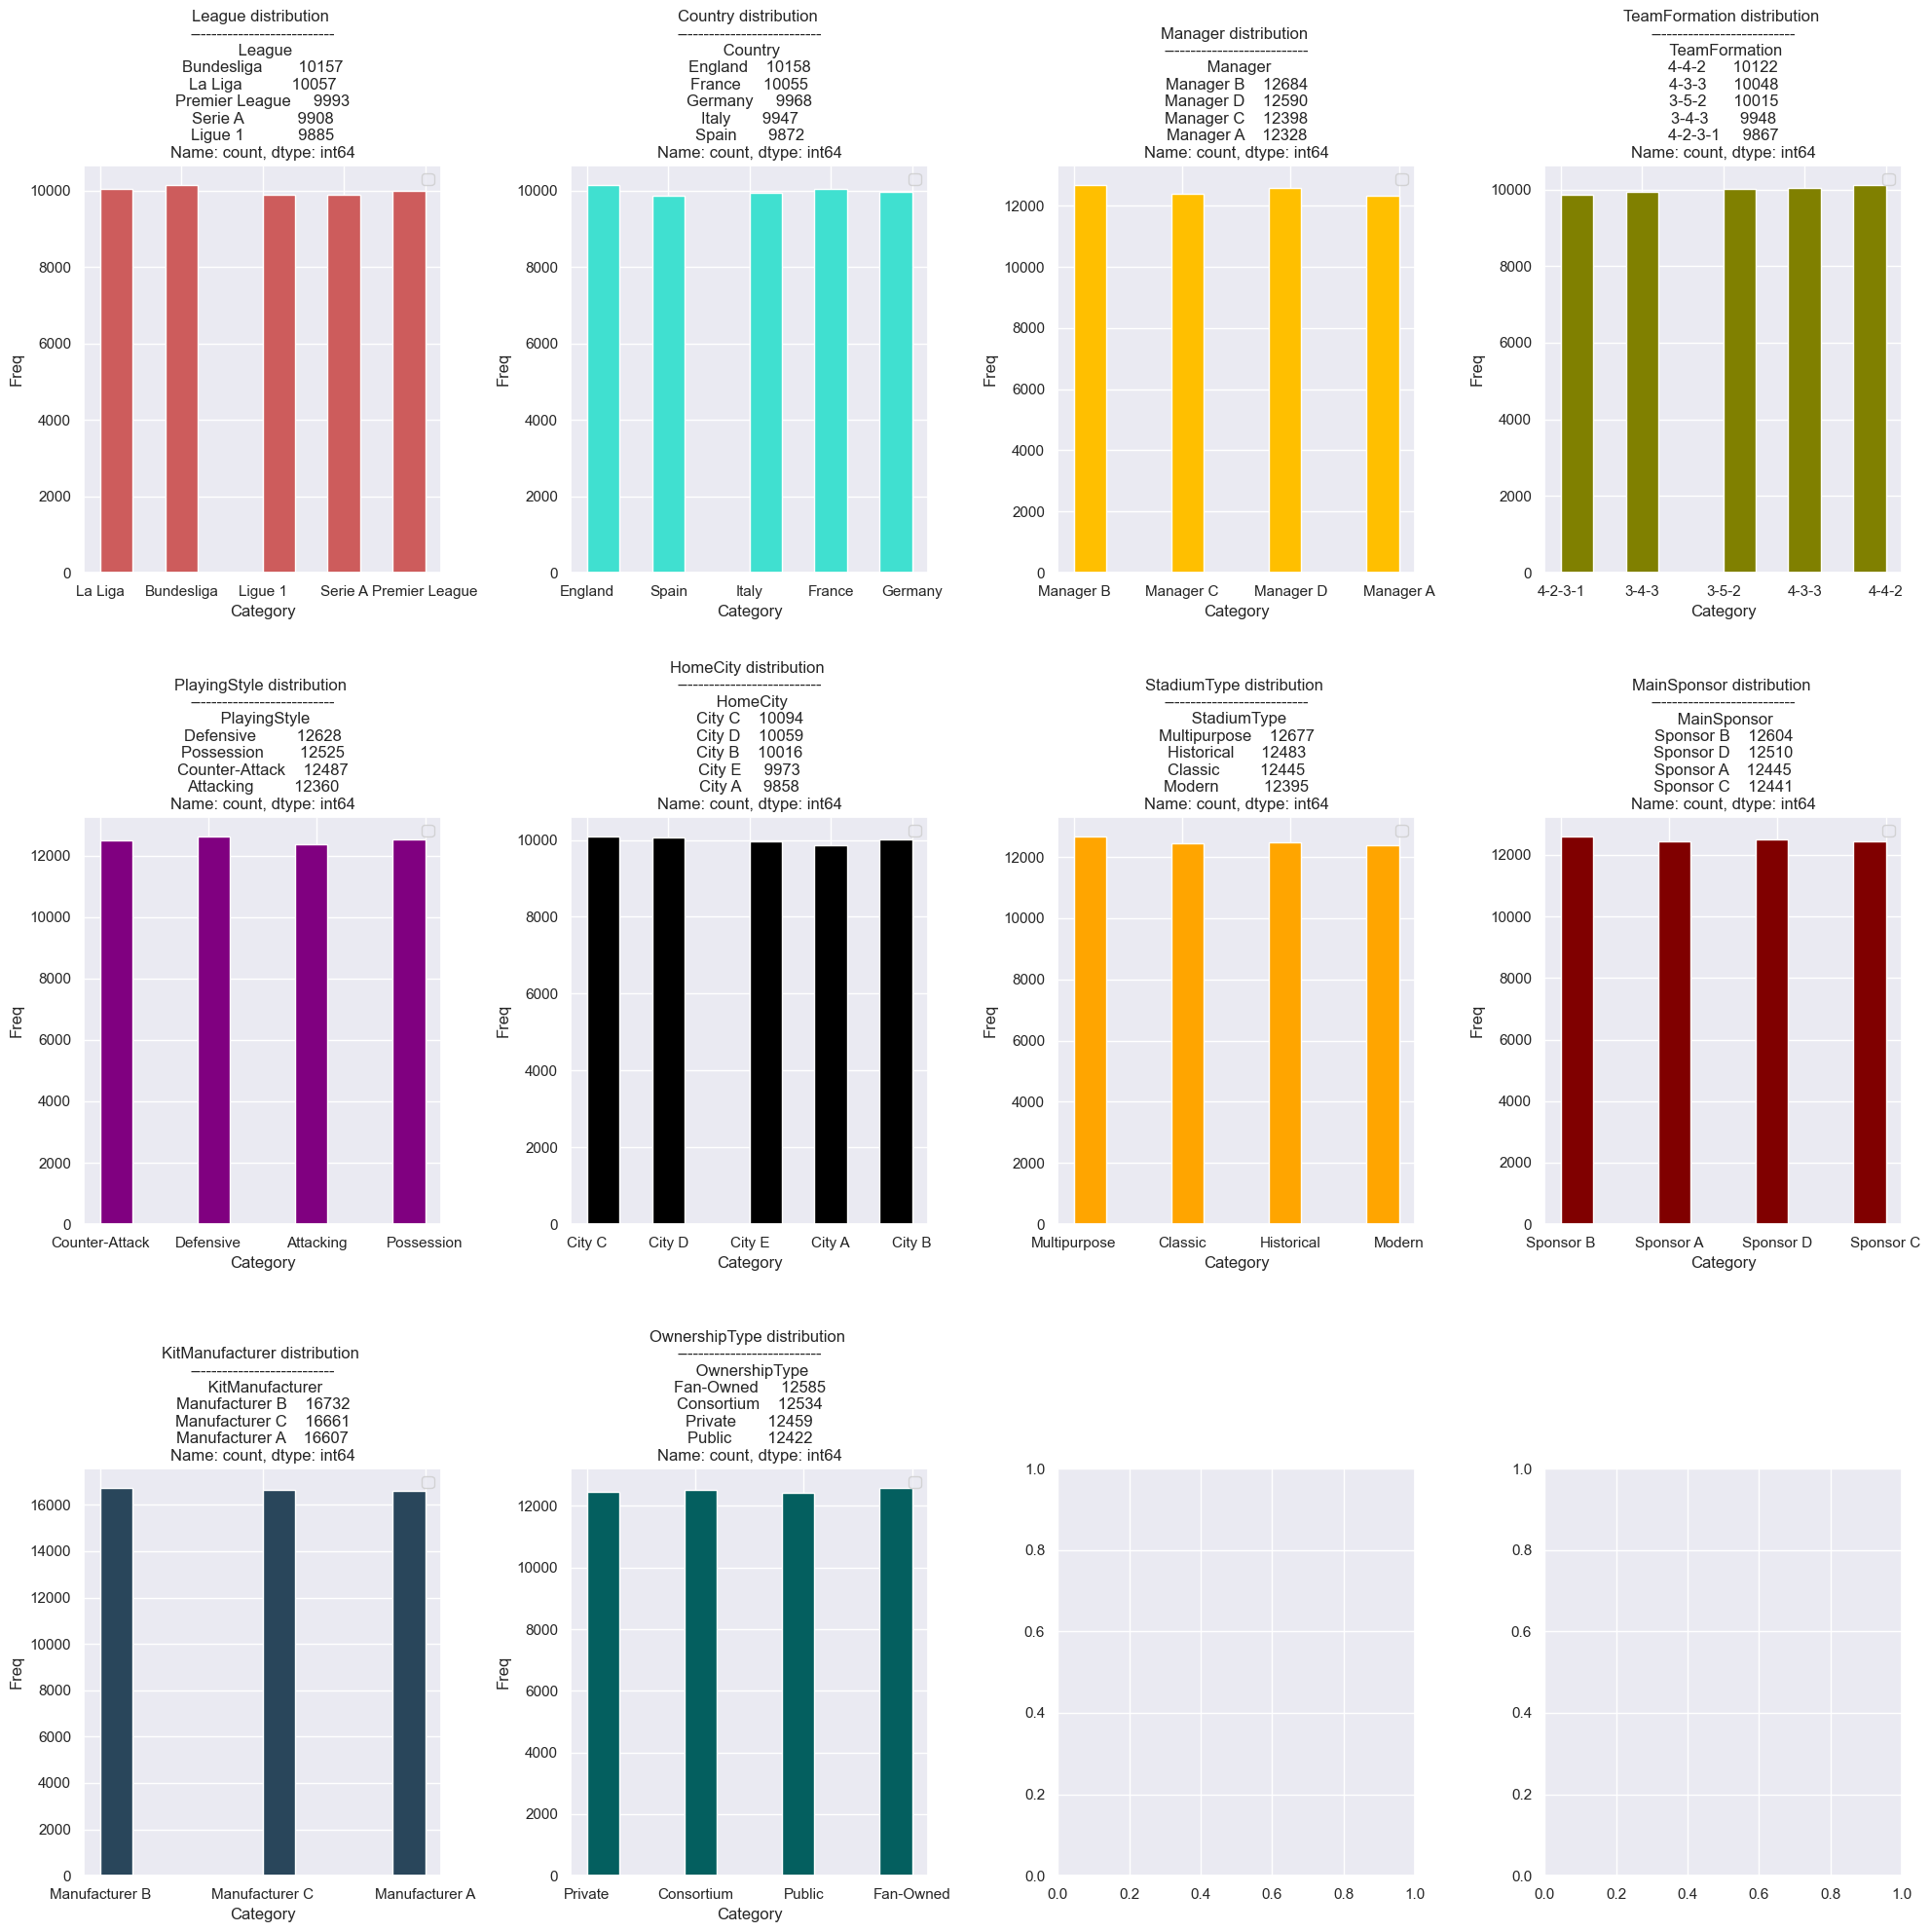

In [459]:
get_obj_cat(df)

### 2. Predictive Analytics

- Performance Prediction: Predict future performance metrics (e.g., number of wins, goals scored) based on historical data.
- Revenue Forecasting: Predict future revenue based on past performance, attendance, and other financial metrics.
- Player Market Value Prediction: Predict the market value of players based on various attributes like age, performance metrics, and market trends.

In [460]:
df.head(3)

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,League,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,79.972750,49,713.968872,15.847841,14.361253,La Liga,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,4375181628
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,26.731697,23.967076,Bundesliga,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,859750388
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,136.648762,38,410.502058,21.365171,64.309831,Ligue 1,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,2168913729


In [461]:
df['TotalMatchesPlayed'] = df['MatchesWonLastSeason'] + df['MatchesDrawnLastSeason'] + df['MatchesLostLastSeason']

In [462]:
df.head()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,League,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price,TotalMatchesPlayed
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,79.972750,49,713.968872,15.847841,14.361253,La Liga,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,4375181628,72
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,26.731697,23.967076,Bundesliga,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,859750388,78
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,136.648762,38,410.502058,21.365171,64.309831,Ligue 1,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,2168913729,40
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,168.683160,6,177.561791,21.483504,82.352127,La Liga,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,1426481894,72
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,188.768072,11,562.114099,26.938414,90.614463,Serie A,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,4038110631,55


In [463]:
df['TotalPoints'] = (df['MatchesWonLastSeason'] * 3) + df['MatchesDrawnLastSeason']
df['GoalDifference'] = df['TotalGoalsLastSeason'] - df['TotalGoalsConcededLastSeason']

In [464]:
df.head()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,League,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price,TotalMatchesPlayed,TotalPoints,GoalDifference
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,79.972750,49,713.968872,15.847841,14.361253,La Liga,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,4375181628,72,84,-23
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,26.731697,23.967076,Bundesliga,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,859750388,78,71,5
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,136.648762,38,410.502058,21.365171,64.309831,Ligue 1,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,2168913729,40,18,-29
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,168.683160,6,177.561791,21.483504,82.352127,La Liga,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,1426481894,72,76,62
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,188.768072,11,562.114099,26.938414,90.614463,Serie A,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,4038110631,55,118,-44


In [465]:
df['League'].value_counts()

League
Bundesliga        10157
La Liga           10057
Premier League     9993
Serie A            9908
Ligue 1            9885
Name: count, dtype: int64

In [466]:

def group_league(lg):
    league = df.groupby('League').get_group(lg).sort_values(by=['TotalPoints', 'GoalDifference'], ascending=[True, True])
    league['TableRank'] = league['TotalPoints'].rank(method='dense', ascending=False).astype(int)
    league.sort_values(ascending=True, by='TableRank', inplace=True)
    return league.head()


In [467]:
df['League'].value_counts()

League
Bundesliga        10157
La Liga           10057
Premier League     9993
Serie A            9908
Ligue 1            9885
Name: count, dtype: int64

In [468]:
group_league('Bundesliga')

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,League,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price,TotalMatchesPlayed,TotalPoints,GoalDifference,TableRank
16875,28.562136,82,37,37,0,46,349.573918,17910,43970.244990,117.519100,174.875077,49,657.501913,19.664517,93.726754,Bundesliga,England,Manager B,4-2-3-1,Defensive,City A,Multipurpose,Sponsor A,Manufacturer A,Public,1793507197,74,148,36,1
48029,20.387483,57,37,37,12,53,233.777754,50544,22308.472868,38.466306,66.601915,43,651.528972,24.006206,50.235950,Bundesliga,France,Manager C,4-2-3-1,Defensive,City B,Modern,Sponsor B,Manufacturer B,Fan-Owned,560854300,86,148,4,1
25805,25.089679,52,37,36,8,24,477.087555,76440,86494.108456,140.435268,11.567814,29,222.921507,22.520700,57.730264,Bundesliga,France,Manager C,4-4-2,Defensive,City D,Multipurpose,Sponsor C,Manufacturer B,Public,2548995719,81,147,28,2
43352,26.124173,36,37,36,22,26,202.990744,23347,41366.187568,81.148060,148.284109,25,323.945901,6.538444,68.213971,Bundesliga,Germany,Manager C,4-2-3-1,Defensive,City A,Historical,Sponsor A,Manufacturer B,Private,3565565086,95,147,10,2
13364,23.410701,61,37,36,0,99,317.251809,80669,57873.962340,77.813365,126.474495,26,188.187475,43.650696,49.511280,Bundesliga,England,Manager D,3-5-2,Counter-Attack,City D,Multipurpose,Sponsor A,Manufacturer C,Private,2598244020,73,147,-38,2


In [469]:

def get_categories(df):
    categories = (df.dtypes == 'object')
    categories = list(categories[categories].index)
    for cat in categories:
        le = LabelEncoder()
        df[cat] = le.fit_transform(df[cat])


In [470]:
get_categories(df)

In [471]:
x = df.drop(columns = 'TotalRevenueLastSeason')
y = df['TotalRevenueLastSeason']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

print('x train: ', x_train.shape)
print('x test: ', x_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (40000, 28)
x test:  (10000, 28)
y train:  (40000,)
y test:  (10000,)


In [472]:
dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)
y_pred

array([214.70282406, 291.94256936, 116.7242512 , ..., 400.29931841,
       182.84943222, 477.31491531])

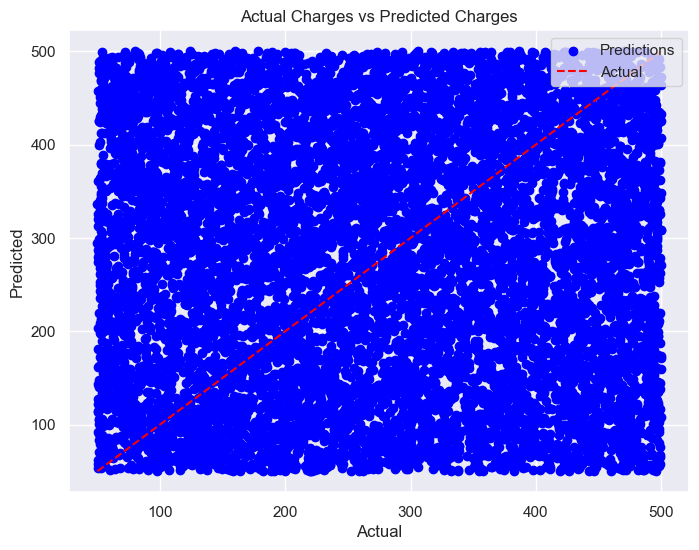

In [473]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
plt.title('Actual Charges vs Predicted Charges')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [474]:
def run_experiment(data):
    le = LabelEncoder()
    encoded_data = le.fit_transform(data)

    input_data = np.asarray(encoded_data)
    input_data_as_array = input_data.reshape(1, -1)
    
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train, y_train)
    
    new_pred = dtr.predict(input_data_as_array)
    print(new_pred)

In [489]:
data = [38.662283, 28, 37, 37, 9, 43, 29062, 35241.530948, 63.947991, 121.318751, 35, 180.852335, 23.812315, 29.286967, "Bundesliga", "England", "Manager D", "4-3-3", "Defensive", "City C", "Modern", "Sponsor C", "Manufacturer B", "Publ  ic", 3719681432, 83, 148, -15]
run_experiment(data)

[485.35573003]


In [488]:
data = [38.662283, 28, 37, 37, 9, 43, 29062, 35241.530948, 63.947991, 121.318751, 35, 180.852335, 23.812315, 29.286967, "Bundesliga", "England", "Manager D", "4-3-3", "Defensive", "City C", "Modern", "Sponsor C", "Manufacturer B", "Private", 3719681432, 83, 148, -15]
run_experiment(data)

[485.35573003]


In [490]:
df.head()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,League,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price,TotalMatchesPlayed,TotalPoints,GoalDifference
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,79.972750,49,713.968872,15.847841,14.361253,1,0,1,2,1,2,3,1,1,2,4375181628,72,84,-23
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,26.731697,23.967076,0,4,2,0,2,2,3,0,1,0,859750388,78,71,5
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,136.648762,38,410.502058,21.365171,64.309831,2,4,2,1,0,3,0,0,2,0,2168913729,40,18,-29
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,168.683160,6,177.561791,21.483504,82.352127,1,3,2,3,1,2,0,3,1,0,1426481894,72,76,62
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,188.768072,11,562.114099,26.938414,90.614463,4,1,3,2,1,3,1,2,1,0,4038110631,55,118,-44
